PCA,Kmean++,Elbow method,collections.Counter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DATA/datasets_3330_5431_turkiye-student-evaluation_generic.csv")

In [3]:
data.head(5)

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  ...  \
0      1      2          1           0           4   3   3   3   3   3  ...   
1      1      2          1           1           3   3   3   3   3   3  ...   
2      1      2          1           2           4   5   5   5   5   5  ...   
3      1      2          1           1           3   3   3   3   3   3  ...   
4      1      2          1           0           1   1   1   1   1   1  ...   

   Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0    3    3    3    3    3    3    3    3    3    3  
1    3    3    3    3    3    3    3    3    3    3  
2    5    5    5    5    5    5    5    5    5    5  
3    3    3    3    3    3    3    3    3    3    3  
4    1    1    1    1    1    1    1    1    1    1  

[5 rows x 33 columns]

In [4]:
data.isnull().any()

instr         False
class         False
nb.repeat     False
attendance    False
difficulty    False
Q1            False
Q2            False
Q3            False
Q4            False
Q5            False
Q6            False
Q7            False
Q8            False
Q9            False
Q10           False
Q11           False
Q12           False
Q13           False
Q14           False
Q15           False
Q16           False
Q17           False
Q18           False
Q19           False
Q20           False
Q21           False
Q22           False
Q23           False
Q24           False
Q25           False
Q26           False
Q27           False
Q28           False
dtype: bool

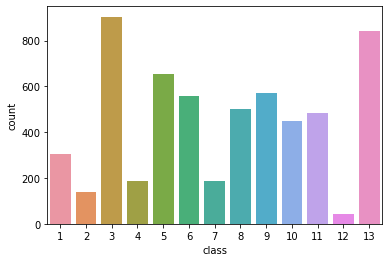

In [5]:
sns.countplot(x="class",data = data)

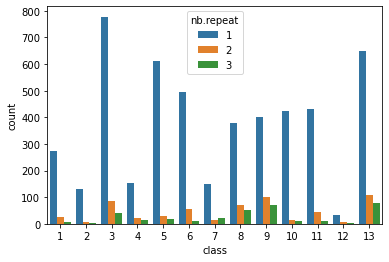

In [6]:
sns.countplot(x="class",hue="nb.repeat",data = data)

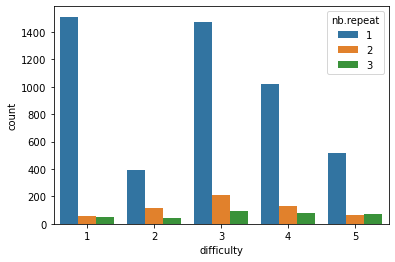

In [7]:
sns.countplot(x="difficulty",hue="nb.repeat",data = data)

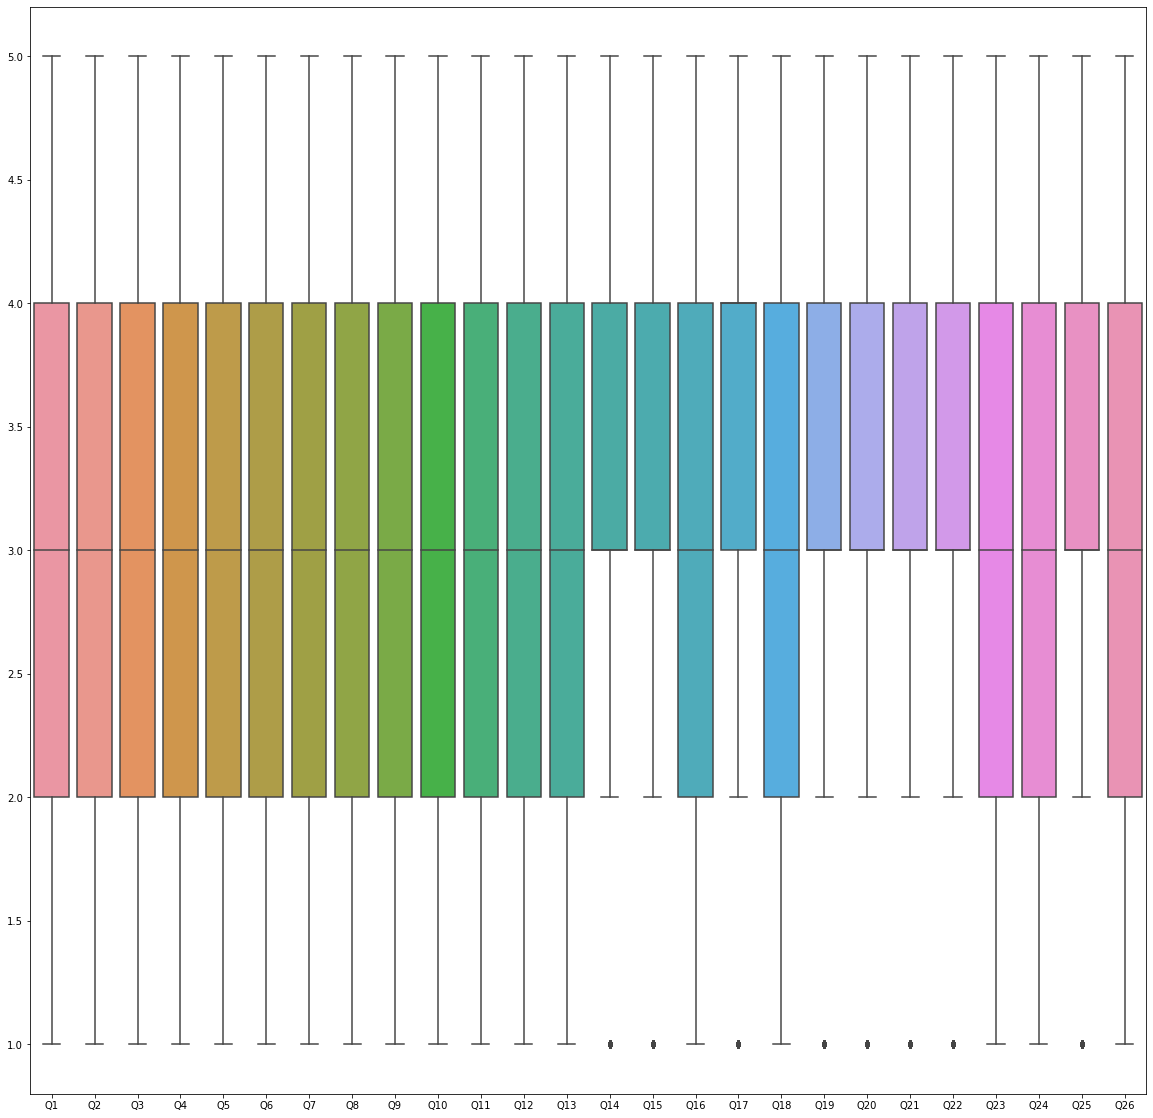

In [8]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=data.iloc[:,5:31 ]);

In [9]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = data[(data["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())

    inslist += 16 * [ins_num] 
    
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

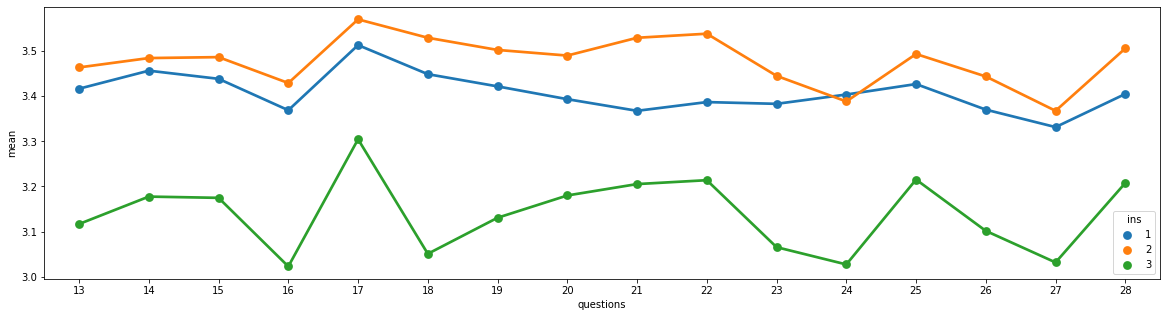

In [10]:
plt.figure(figsize=(20,5))
sns.pointplot(x="questions",y="mean",hue="ins",data=totalplotdata)

Based on above graph we can see that According to the Student ratings we see that Instructor 1 and 2 are performing well and got similar rateings but Instructor 3 got less ratings

In [11]:
dataset_inst3 = data[(data["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()

totalplotdata = pd.DataFrame(columns=['class','questions', 'mean'])
for class_inst3 in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3['class'] == class_inst3)]
    
    class_list = []
    questions = []
    questions_mean = []
    
    for i in range(1,13):
        questions.append(i)
        
    for i in range(5,17):
        questions_mean.append(class_data.iloc[:,i].mean())
        
    class_list += 12 * [class_inst3]
    plotdata = pd.DataFrame(list(zip(class_list,questions,questions_mean))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

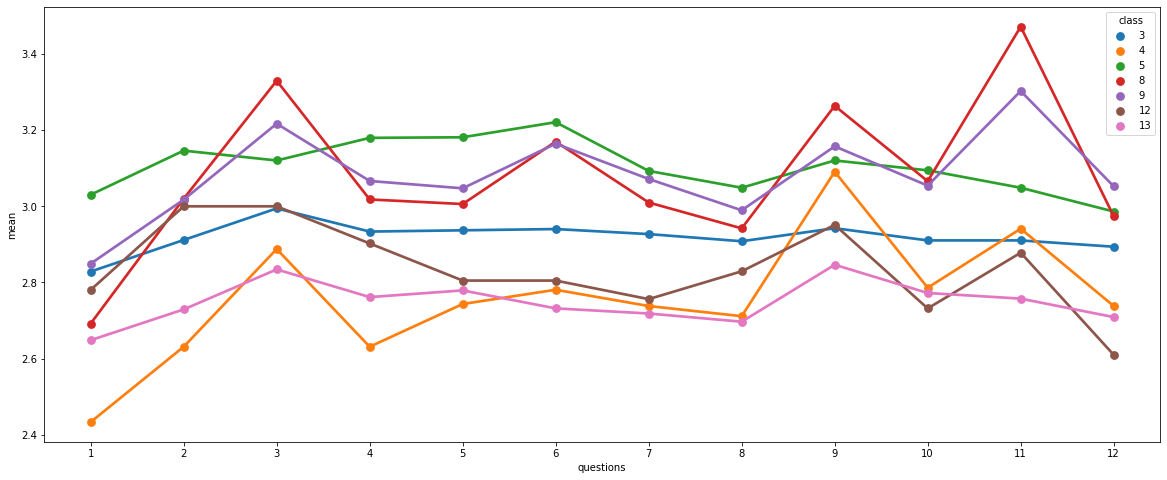

In [12]:
plt.figure(figsize = (20,8))
sns.pointplot(x="questions",y="mean",hue="class",data=totalplotdata)

By above analysis we can recommend the instructor 3 for check on course 4 and 13.

In [13]:
question_data = data.iloc[:,5:33]

In [14]:
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
# n_components : Number of components to keep. if n_components is not set all components are kept:
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(question_data)

In [15]:
dataset_questions_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

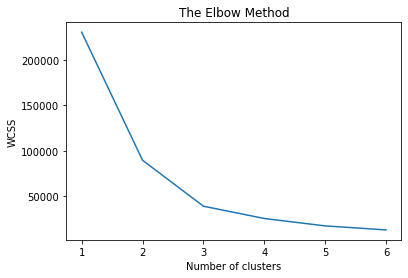

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS : Sum of squared distances of samples to their closest cluster center.

In [21]:
kmeans = KMeans(n_clusters = 3,init='k-means++')
y_predict = kmeans.fit_predict(dataset_questions_pca)

In [22]:
y_predict

array([2, 2, 1, ..., 1, 0, 0])

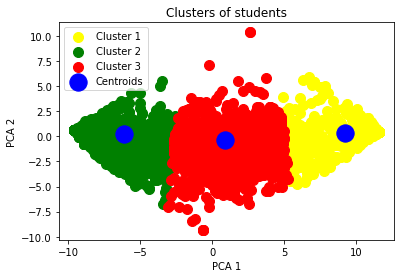

In [24]:
plt.scatter(dataset_questions_pca[y_predict == 0, 0], dataset_questions_pca[y_predict == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_predict == 1, 0], dataset_questions_pca[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_predict == 2, 0], dataset_questions_pca[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [28]:
y_predict

array([2, 2, 1, ..., 1, 0, 0])

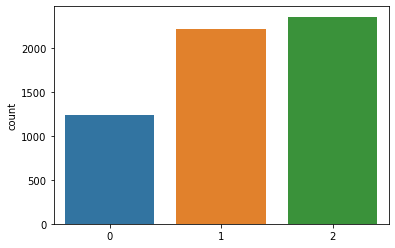

In [30]:
sns.countplot(y_predict)

In [32]:
import collections
collections.Counter(y_predict)

Counter({2: 2360, 1: 2220, 0: 1240})